In [2]:
import random

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

%matplotlib inline

random.seed(5)
np.random.seed(5)
torch.random.manual_seed(5)

### Question 1.1

In [2]:
x1 = np.array([-2.0, 1.0, 0.5])
x2 = np.array([1.0, 1.5, -0.5])
x3 = np.array([-1.5, 1.0, -0.5])
x4 = np.array([-2.0, -2.5, 1.5])

X = np.array([x1, x2, x3, x4])

print(X.shape)

(4, 3)


In [5]:
q = np.array([-2.0, 1.0, -1.0])

print(np.size(q))

scores = X.dot(q) / np.sqrt(np.size(q))
probabilities = np.exp(scores) / np.sum(np.exp(scores))
output = X.T.dot(probabilities)

print(X.dot(q))
print(scores)
print(probabilities)
print(output)

3
[4.5 0.  4.5 0. ]
[2.59807621 0.         2.59807621 0.        ]
[0.46536883 0.03463117 0.46536883 0.03463117]
[-1.66342208  0.8961065   0.03463117]


### Question 1.2

In [21]:
W_Q = np.array([[1, -1.5], [0, 2], [-0.5, -1]])
W_K = np.array([[-1.5, -1], [2.5, 0], [0.5, -1]])
W_V = np.array([[1, 2.5], [-0.5, -2], [0, -1]])

#print(W_Q)
#print(W_K)
#print(W_V)

Q = X.dot(W_Q)
K = X.dot(W_K)
V = X.dot(W_V)

print(Q)
print(K)
print(V)

print(np.sqrt(np.size(Q, 1)))

scores = Q.dot(K.T) / np.sqrt(np.size(Q, 1))
probabilities = np.exp(scores) / np.sum(np.exp(scores), axis=1)[:, None]

Z = probabilities.dot(V)

print(scores)
print(probabilities)
print(Z)

print(probabilities.sum(axis=1))

[[-2.25  4.5 ]
 [ 1.25  2.  ]
 [-1.25  4.75]
 [-2.75 -3.5 ]]
[[ 5.75  1.5 ]
 [ 2.   -0.5 ]
 [ 4.5   2.  ]
 [-2.5   0.5 ]]
[[-2.5  -7.5 ]
 [ 0.25  0.  ]
 [-2.   -5.25]
 [-0.75 -1.5 ]]
1.4142135623730951
[[ -4.37522321  -4.77297077  -0.79549513   5.5684659 ]
 [  7.20365033   1.06066017   6.80590277  -1.50260191]
 [ -0.04419417  -3.44714556   2.74003878   3.8890873 ]
 [-14.89343658  -2.65165043 -13.70019389   3.62392225]]
[[4.79433566e-05 3.22098620e-05 1.71943035e-03 9.98200416e-01]
 [5.97319598e-01 1.28333499e-03 4.01298182e-01 9.88847812e-05]
 [1.46423661e-02 4.87223528e-04 2.37021787e-01 7.47848624e-01]
 [9.06143069e-09 1.87817885e-03 2.98824011e-08 9.98121782e-01]]
[[-0.75220098 -1.50668721]
 [-2.29564869 -6.58686077]
 [-1.07141415 -2.47595506]
 [-0.74812187 -1.4971829 ]]
[1. 1. 1. 1.]


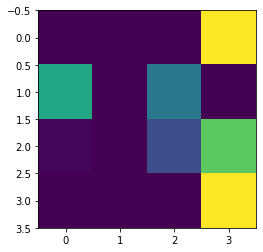

In [7]:
import matplotlib.pyplot as plt
plt.imshow(probabilities)

### Question 1.3

[[4.79433566e-05 3.22098620e-05 1.71943035e-03 9.98200416e-01]
 [5.97319598e-01 1.28333499e-03 4.01298182e-01 9.88847812e-05]
 [1.46423661e-02 4.87223528e-04 2.37021787e-01 7.47848624e-01]
 [9.06143069e-09 1.87817885e-03 2.98824011e-08 9.98121782e-01]]
[[-0.75220098 -1.50668721]
 [-2.29564869 -6.58686077]
 [-1.07141415 -2.47595506]
 [-0.74812187 -1.4971829 ]]


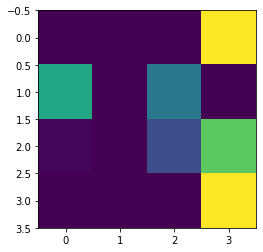

[[1.18306921e-01 2.01966211e-02 1.68483136e-01 6.93013322e-01]
 [8.48429312e-04 9.98944583e-01 2.06267364e-04 7.20592823e-07]
 [2.67590116e-02 7.79843042e-04 5.42703523e-02 9.18190793e-01]
 [2.47463407e-05 6.12522986e-10 2.06437556e-04 9.99768815e-01]]
[[-2.26628332 -2.26628332]
 [ 1.99725652  1.99725652]
 [-2.82066255 -2.82066255]
 [-2.99952526 -2.99952526]]


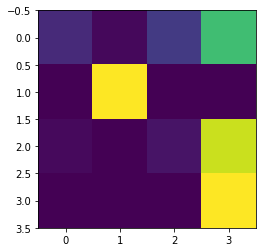

[[-0.75220098 -1.50668721 -2.26628332 -2.26628332]
 [-2.29564869 -6.58686077  1.99725652  1.99725652]
 [-1.07141415 -2.47595506 -2.82066255 -2.82066255]
 [-0.74812187 -1.4971829  -2.99952526 -2.99952526]]
[[-6.04664898  3.77781072 -0.75731086]
 [ 8.28741825  0.14750295 10.57968068]
 [-7.3905735   5.09982766 -0.01158073]
 [-8.25045389  4.87428797 -1.50140321]]


In [8]:
W_O = np.array([[-1, 1.5, 2], [0, -1, -2], [1, -1.5, 0], [2, 0, 1]])

W_Q_heads = [W_Q, np.ones_like(W_Q)]
W_K_heads = [W_K, np.ones_like(W_K)]
W_V_heads = [W_V, np.ones_like(W_V)]

head_representations = []

for W_Q_h, W_K_h, W_V_h in zip(W_Q_heads, W_K_heads, W_V_heads):
    Q_h = X.dot(W_Q_h)
    K_h = X.dot(W_K_h)
    V_h = X.dot(W_V_h)
    scores = Q_h.dot(K_h.T) / np.sqrt(np.size(Q_h, 1))
    probabilities = np.exp(scores) / np.sum(np.exp(scores), axis=1)[:, None]
    Z_h = probabilities.dot(V_h)
    head_representations.append(Z_h)
    print(probabilities)
    print(Z_h)
    plt.imshow(probabilities)
    plt.show()
    
print(np.concatenate(head_representations, axis=1))

Z = np.concatenate(head_representations, axis=1).dot(W_O)

print(Z)

### Question 2

In this exercise, you will implement a sequence-to-sequence network that reverses strings with the help of attention. We will randomly generate strings consisting of "a", "b", "c", and "d".

In [4]:
BOS = "<s>"
EOS = "</s>"

raw_vocab = list("abcd")
itos = [BOS, EOS] + raw_vocab
stoi = {n: i for i, n in enumerate(itos)}
vocab_size = len(itos)  # Plus BOS/EOS

N = 200
valid_size = 100

def sample_string(min_length, max_length):
    length = random.randrange(min_length, max_length)
    return "".join([random.choice(raw_vocab) for _ in range(length)])

def sample_strings(min_length, max_length, size):
    return [sample_string(min_length, max_length) for _ in range(size)]

def to_tensor(name):
    indices = [stoi[BOS]] + [stoi[n] for n in name] + [stoi[EOS]]
    return torch.tensor(indices, dtype=torch.long).unsqueeze(0)

def make_dataset(lines):
    dataset = [(to_tensor(line), to_tensor(reversed(line))) for line in lines]
    return dataset

train_lines = sample_strings(3, 15, N)
valid_lines = sample_strings(3, 15, valid_size)

train_dataset = make_dataset(train_lines)
valid_dataset = make_dataset(valid_lines)

print(train_lines[:10])

['ccac', 'dcdabccd', 'abdacbc', 'ccdadbdadbad', 'accaaaccc', 'dabbccbadba', 'caacaaac', 'abbcd', 'baadca', 'dbabbabccbdbbd']


The first part of the model is an RNN-based encoder:

In [5]:
class Encoder(nn.Module):
    def __init__(self, vocab_size, embedding_size, hidden_size, bidirectional=False):
        super(Encoder, self).__init__()

        self.embeddings = nn.Embedding(vocab_size, embedding_size)

        if bidirectional:
            hidden_size //= 2
        self.rnn = nn.LSTM(
            embedding_size, 
            hidden_size, 
            bidirectional=bidirectional, 
            batch_first=True
        )

    def forward(self, input, hidden=None):
        """
        input (LongTensor): batch x src length
        src length (batch-length list0: If given, the input will be packed
        hidden: hidden or hidden/cell state input dimensions for the RNN type
        returns:
            output (FloatTensor): batch x src length x hidden size
            hidden_n (FloatTensor): hidden or hidden/cell state input
                dimensions for the RNN type
        """
        emb = self.embeddings(input)
        output, hidden_n = self.rnn(emb, hidden)
        if self.rnn.bidirectional:
            hidden_n = self._reshape_hidden(hidden_n)
        return output, hidden_n

    def _merge_tensor(self, state_tensor):
        forward_states = state_tensor[::2]
        backward_states = state_tensor[1::2]
        return torch.cat([forward_states, backward_states], 2)

    def _reshape_hidden(self, hidden):
        """
        hidden:
            num_layers * num_directions x batch x self.hidden_size // 2
            or a tuple of these
        returns:
            num_layers
        """
        assert self.rnn.bidirectional
        if isinstance(hidden, tuple):
            return tuple(self._merge_tensor(h) for h in hidden)
        else:
            return self._merge_tensor(hidden)

We also need to define a decoder. This implementation works both with and without an attention mechanism.

In [6]:
class Decoder(nn.Module):
    def __init__(self, vocab_size, embedding_size, hidden_size, attn=None):
        super(Decoder, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_size)
        self.rnn = nn.LSTM(embedding_size, hidden_size, batch_first=True)
        self.output_layer = nn.Linear(hidden_size, vocab_size)
        self.attn = attn

    def forward(self, input, context, hidden):
        """
        input (LongTensor): batch x tgt length
        context (FloatTensor): batch x src length x hidden size
        hidden: hidden or hidden/cell state input dimensions for the RNN type
        returns (FloatTensor): (batch*tgt length) x output size
        """
        emb = self.embeddings(input)
        output, hidden_n = self.rnn(emb, hidden)

        alignment = None
        # apply attention between source context and query from
        # decoder RNN
        if self.attn is not None:
            output, alignment = self.attn(output, context)

        flat_output = output.contiguous().view(-1, self.rnn.hidden_size)
        return self.output_layer(flat_output), alignment

We can put them together into an encoder-decoder model class, like this:

In [7]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, src, tgt):
        """
        src, tgt (LongTensor): (batch size x sequence length)
        returns (FloatTensor): (batch*tgt length) x output size
        """
        context, enc_hidden = self.encoder(src)
        return self.decoder(tgt, context=context, hidden=enc_hidden)

With our base model defined, we can write training and validation code:

In [8]:
def train_epoch(model, train_iter, loss, optimizer):
    epoch_loss = 0.0
    model.train()
    random.shuffle(train_iter)  # present examples in random order
    for src, tgt in train_iter:
        model.zero_grad()
        tgt_in = tgt[:, :-1]
        pred, _ = model(src, tgt_in)
        gold = tgt[:, 1:].contiguous().view(-1)

        batch_loss = loss(pred, gold)
        batch_loss.backward()
        optimizer.step()
        epoch_loss += batch_loss.item()
    return epoch_loss


def validate(model, data_iter):
    model.eval()
    n_correct = 0
    n_total = 0
    with torch.no_grad():
        for src, tgt in data_iter:
            tgt_in = tgt[:, :-1]
            pred = model(src, tgt_in)[0].argmax(dim=1)
            gold = tgt[:, 1:].contiguous().view(-1)
            n_correct += (pred == gold).sum().item()
            n_total += gold.size(0)
        return n_correct / n_total


def train(model, train, valid, epochs=30, learning_rate=0.5):
    loss = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    train_losses = []
    valid_accs = []
    epochs = list(range(1, epochs + 1))
    for epoch in epochs:
        print('Training epoch {}'.format(epoch))
        train_loss = train_epoch(model, train, loss, optimizer)
        train_losses.append(train_loss)
        valid_acc = validate(model, valid)
        valid_accs.append(valid_acc)
        print('Train loss: {} ; Validation acc: {}'.format(train_loss, valid_acc))

Train a unidirectional model without attention:

In [10]:
embedding_size = vocab_size
hidden_size = 64

enc = Encoder(vocab_size, embedding_size, hidden_size)
dec = Decoder(vocab_size, embedding_size, hidden_size)
enc.embeddings.weight.data = torch.eye(vocab_size)
dec.embeddings.weight.data = enc.embeddings.weight.data
enc.embeddings.weight.requires_grad = False
dec.embeddings.weight.requires_grad = False

model = Seq2Seq(enc, dec)
print(model)

train(model, train_dataset, valid_dataset, epochs=50)

Seq2Seq(
  (encoder): Encoder(
    (embeddings): Embedding(6, 6)
    (rnn): LSTM(6, 64, batch_first=True)
  )
  (decoder): Decoder(
    (embeddings): Embedding(6, 6)
    (rnn): LSTM(6, 64, batch_first=True)
    (output_layer): Linear(in_features=64, out_features=6, bias=True)
  )
)
Training epoch 1
Train loss: 321.8226054906845 ; Validation acc: 0.24092409240924093
Training epoch 2
Train loss: 313.7716647386551 ; Validation acc: 0.23102310231023102
Training epoch 3
Train loss: 310.373294711113 ; Validation acc: 0.24422442244224424
Training epoch 4
Train loss: 287.7677994966507 ; Validation acc: 0.33663366336633666
Training epoch 5
Train loss: 254.19489431381226 ; Validation acc: 0.38063806380638066
Training epoch 6
Train loss: 231.97208958864212 ; Validation acc: 0.45544554455445546
Training epoch 7
Train loss: 210.00151512026787 ; Validation acc: 0.5379537953795379
Training epoch 8
Train loss: 193.97680239379406 ; Validation acc: 0.5533553355335533
Training epoch 9
Train loss: 180.508

This model often manages to predict the right sequence, but it also often fails. Note that the decoder makes use of the *last* hidden state from the encoder, which has recently seen the final time step of the source sequence (in other words, the first element it needs to predict), but the other elements less recently. If only there were a way to make it easier for the model to focus on less recent positions...

The attention mechanism is an extra layer for the decoder that can do precisely this. In this exercise, we consider a simple but effective attention mechanism called *dot product attention*.


In [11]:
class DotProdAttention(nn.Module):

    def __init__(self, hidden_size):
        super().__init__()
        # todo

    def forward(self, query, context):
        """
        query: batch x tgt_length x hidden_size
        context: batch x src_length x hidden_size
        """
        # todo
        return attn_h_t, alignment

Now that attention has been implemented, we can train the model:

In [13]:
attn = DotProdAttention(hidden_size)
enc = Encoder(vocab_size, embedding_size, hidden_size, bidirectional=True)
dec = Decoder(vocab_size, embedding_size, hidden_size, attn=attn)
enc.embeddings.weight.data = torch.eye(vocab_size)
dec.embeddings.weight.data = enc.embeddings.weight.data
enc.embeddings.weight.requires_grad = False
dec.embeddings.weight.requires_grad = False

attn_model = Seq2Seq(enc, dec)
print(attn_model)

train(attn_model, train_dataset, valid_dataset, epochs=30)

Seq2Seq(
  (encoder): Encoder(
    (embeddings): Embedding(6, 6)
    (rnn): LSTM(6, 32, batch_first=True, bidirectional=True)
  )
  (decoder): Decoder(
    (embeddings): Embedding(6, 6)
    (rnn): LSTM(6, 64, batch_first=True)
    (output_layer): Linear(in_features=64, out_features=6, bias=True)
    (attn): DotProdAttention(
      (mlp): Sequential(
        (0): Linear(in_features=128, out_features=64, bias=True)
        (1): Tanh()
      )
    )
  )
)
Training epoch 1
Train loss: 321.6503075361252 ; Validation acc: 0.23102310231023102
Training epoch 2
Train loss: 306.41105937957764 ; Validation acc: 0.34433443344334436
Training epoch 3
Train loss: 272.4157664477825 ; Validation acc: 0.44994499449944997
Training epoch 4
Train loss: 225.01492762565613 ; Validation acc: 0.5291529152915292
Training epoch 5
Train loss: 165.55305808782578 ; Validation acc: 0.8503850385038504
Training epoch 6
Train loss: 111.27659406885505 ; Validation acc: 0.8998899889988999
Training epoch 7
Train loss: 37.

We can also visualize the model's attention matrix:

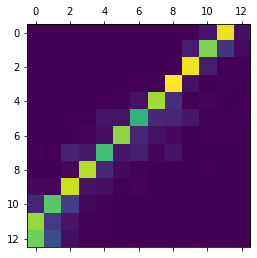

In [15]:
import matplotlib.pyplot as plt

string = "abacadabacc"  # try something
reversed_string = reversed(string)

src = to_tensor(string)
tgt = to_tensor(reversed_string)

with torch.no_grad():
    _, alignment = attn_model(src, tgt)

attn_matrix = alignment.squeeze(0).numpy()
plt.matshow(attn_matrix)